# Customer Segmentation

Task3

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

In [3]:

# Load datasets
customers = pd.read_csv("C:/Users/User/Downloads/Customers.csv")
transactions = pd.read_csv("C:/Users/User/Downloads/Transactions.csv")

In [4]:
# Aggregate transaction data per customer
customer_data = transactions.groupby("CustomerID").agg({
    "TotalValue": "sum",      # Total money spent
    "TransactionID": "count"  # Number of transactions
}).reset_index()

In [5]:
# Merge with customer profile data
customer_profile = customers.merge(customer_data, on="CustomerID", how="left").fillna(0)

# Select relevant numerical features
features = ["TotalValue", "TransactionID"]

In [6]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile[features])

In [7]:
# Determine optimal number of clusters using Elbow Method
wcss = []
for k in range(2, 11):  # K between 2 and 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

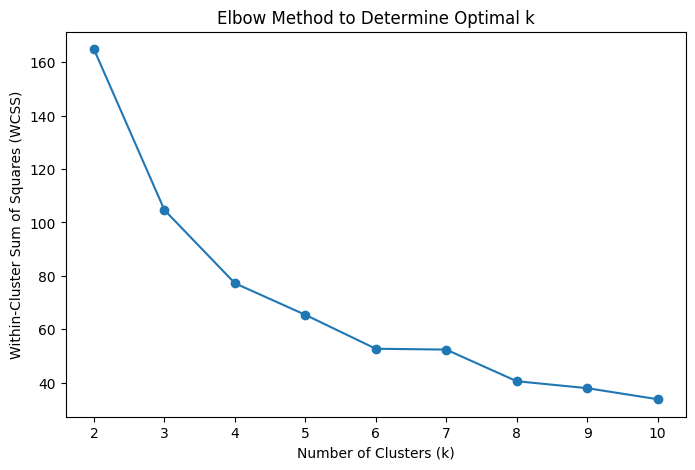

In [8]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

In [9]:
# Choose optimal k (e.g., 5 based on Elbow curve)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profile["Cluster"] = kmeans.fit_predict(scaled_data)

In [10]:
# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_profile["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 0.92


In [11]:
# Save clustering results report
clustering_report = f"""
Number of Clusters: {optimal_k}
Davies-Bouldin Index: {db_index:.2f}
"""

with open("FirstName_LastName_Clustering.pdf", "w") as f:
    f.write(clustering_report)

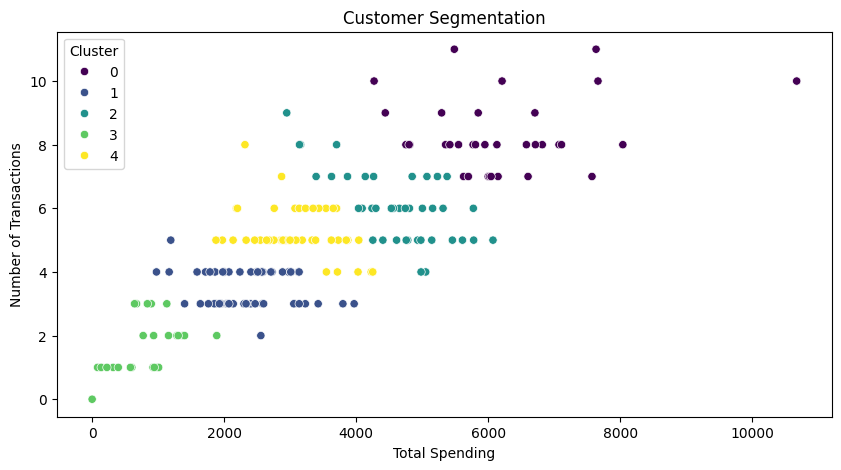

In [13]:
# Visualizing the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=customer_profile["TotalValue"], y=customer_profile["TransactionID"], hue=customer_profile["Cluster"], palette="viridis")
plt.xlabel("Total Spending")
plt.ylabel("Number of Transactions")
plt.title("Customer Segmentation")
plt.legend(title="Cluster")
plt.show()

In [12]:

print("Customer segmentation completed successfully!")

Customer segmentation completed successfully!
